In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

import missingno as msno 

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

%matplotlib inline

In [2]:
df_train= pd.read_csv('./houseprices/train.csv')
df_tesst= pd.read_csv('./houseprices/test.csv')

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
#head 반대 tail

In [5]:
#카테고리형과 숫자형을 나눠서 보고 싶을때
df_train_num = df_train.select_dtypes(include=[np.number])
df_train_obj = df_train.select_dtypes(include=[np.object])

#다른 방법으로 include와 exclude방법이 있다.
'''
incldue = 'object'하면
exclude = 'object로 object인 것을 포함하는 것과 object가 아닌것을 포함하는 것
'''



"\nincldue = 'object'하면\nexclude = 'object로 object인 것을 포함하는 것과 object가 아닌것을 포함하는 것\n"

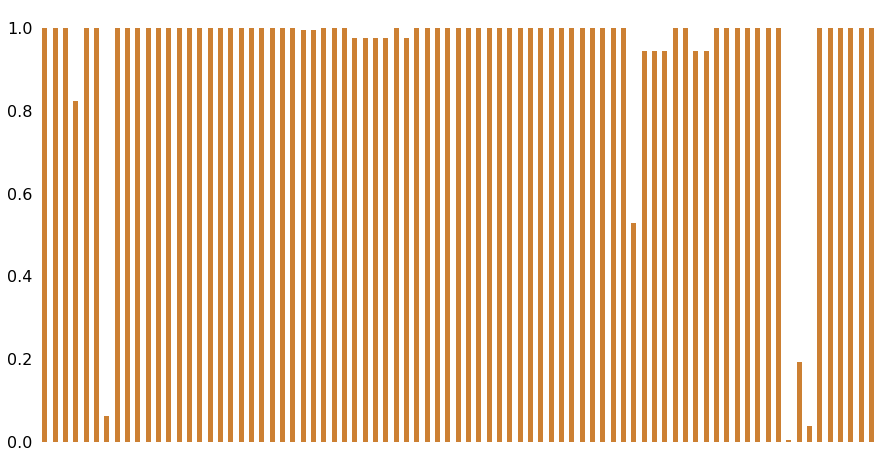

In [6]:
msno.bar(df=df_train.iloc[:,:], figsize=(15,8), color=(0.8,0.5,0.2))

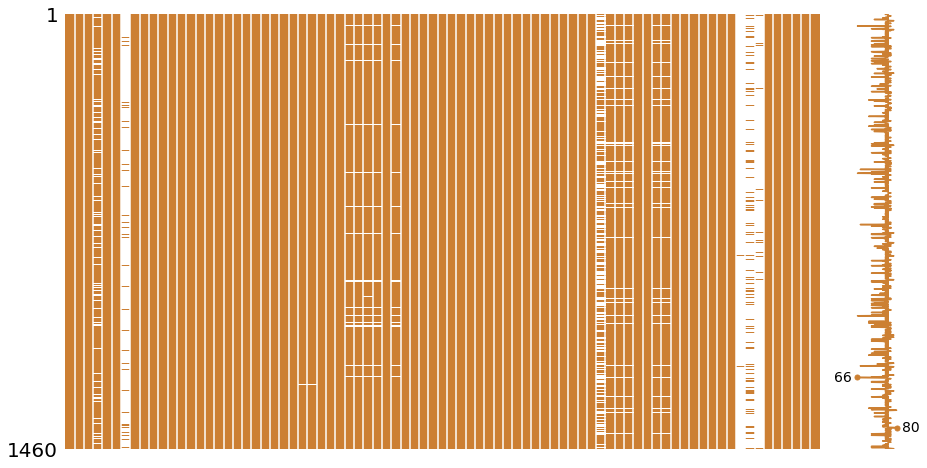

In [7]:
msno.matrix(df=df_train.iloc[:,:], figsize=(15,8), color=(0.8,0.5,0.2))

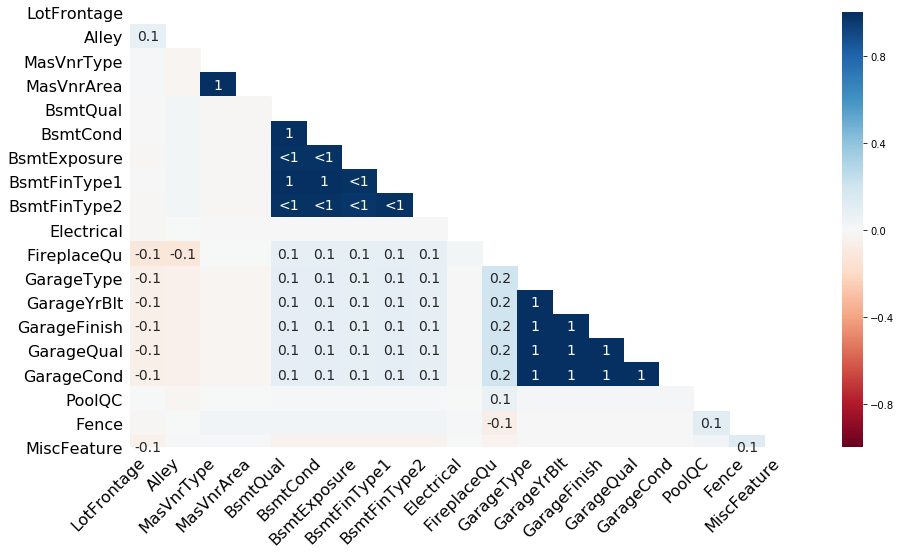

In [8]:
msno.heatmap(df=df_train.iloc[:,:], figsize=(15,8))

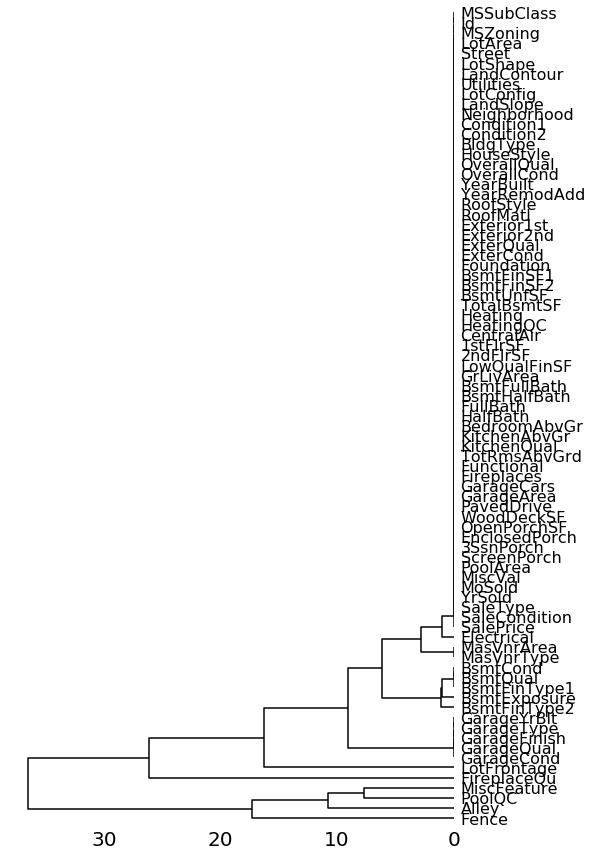

In [9]:
msno.dendrogram(df=df_train.iloc[:,:], figsize=(8,15))

In [10]:
df_train.skew() #표본 비대칭도
#왜도, 평균 값을 기준으로 왼쪽과 오른쪽 중 어느 쪽에 더 치우져 있는지 확인한다.

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [11]:
df_train.kurt() #표본 첨도
#첨도가 3이면 정규분포와 동일하다. 이보다 크면 좌,우에 극값이 많이 존재함을 의미.

Id                -1.200000
MSSubClass         1.580188
LotFrontage       17.452867
LotArea          203.243271
OverallQual        0.096293
OverallCond        1.106413
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.082417
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchenAbvGr      21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.418341
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0

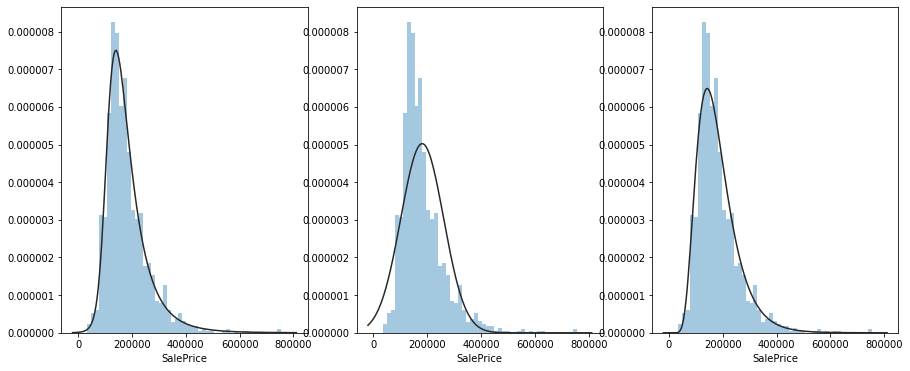

In [12]:
from scipy import stats

target = df_train['SalePrice']
f,ax=plt.subplots(1,3, figsize=(15,6), sharex=True)
# sns.distplot(target,ax=ax[0])
sns.distplot(target,kde=False, fit=stats.johnsonsu,ax=ax[0])
sns.distplot(target,kde=False, fit=stats.norm, ax=ax[1])
sns.distplot(target,kde=False, fit=stats.lognorm, ax=ax[2])
#차이가 두드러지는 걸 완만하게,
#norm이 어느정도 gap이 보이는걸 로그를 취하니
#전체적인 차이는 줄면서 방향을 따라감.

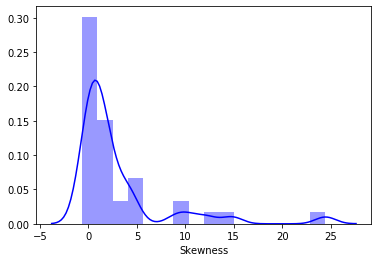

In [13]:
sns.distplot(df_train.skew(), color='blue', axlabel='Skewness')

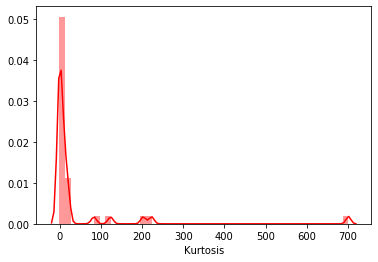

In [14]:
sns.distplot(df_train.kurt(), color='r', axlabel='Kurtosis',
            norm_hist=False, kde=True, rug=False)

(array([148., 723., 373., 135.,  51.,  19.,   4.,   3.,   2.,   2.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

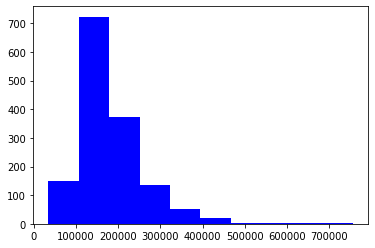

In [15]:
plt.hist(df_train['SalePrice'],orientation='vertical', histtype='bar',
        color='blue')

(array([  5.,  12.,  54., 184., 470., 400., 220.,  90.,  19.,   6.]),
 array([10.46024211, 10.7676652 , 11.07508829, 11.38251138, 11.68993448,
        11.99735757, 12.30478066, 12.61220375, 12.91962684, 13.22704994,
        13.53447303]),
 <a list of 10 Patch objects>)

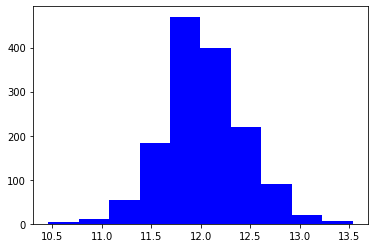

In [16]:
log_target=np.log(df_train['SalePrice'])
log_target.skew()
plt.hist(log_target, color='blue')

In [17]:
#visualisation methods to analyze the data better
#1.correlation

#숫자형과 target과의 상관관계를 알고싶을떄?
correlation=df_train_num.corr() #전체 각 feature간의 관계
correlation['SalePrice'].sort_values(ascending=False) #SalePrice = target이 다른 feature들 과의 관계를 값으로 보여줌.


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

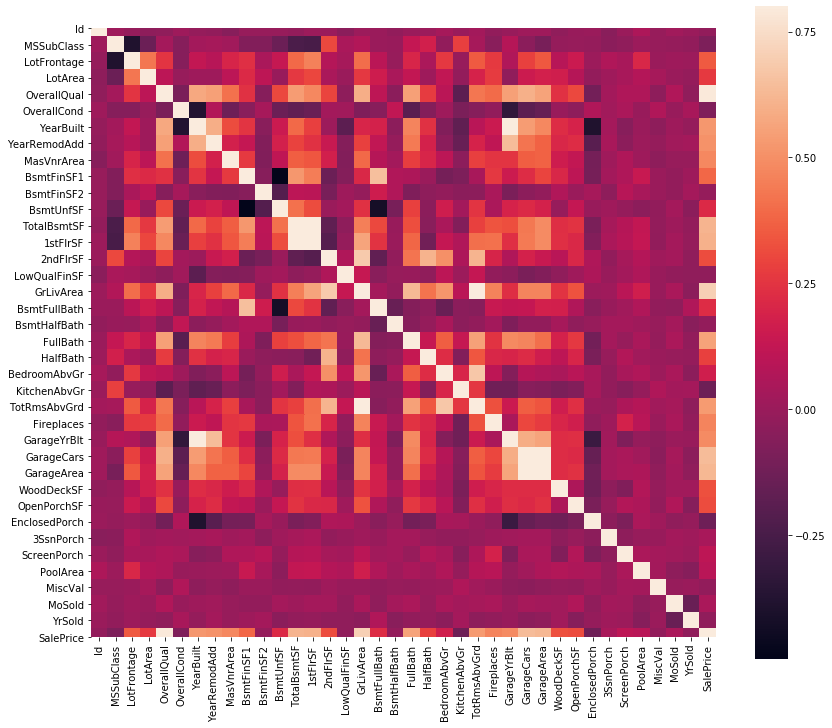

In [18]:
f,ax=plt.subplots(figsize=(14,12))
sns.heatmap(correlation, square=True, vmax=0.8)

In [19]:
#zoomed heatmap
k=11
cols=correlation.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df_train[cols].values.T)
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733,
        0.50710097],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277,
        0.55068392],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971,
        0.28738852],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009,
        0.42062215],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382,
        0.37159981],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ,
        0.29106558],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.

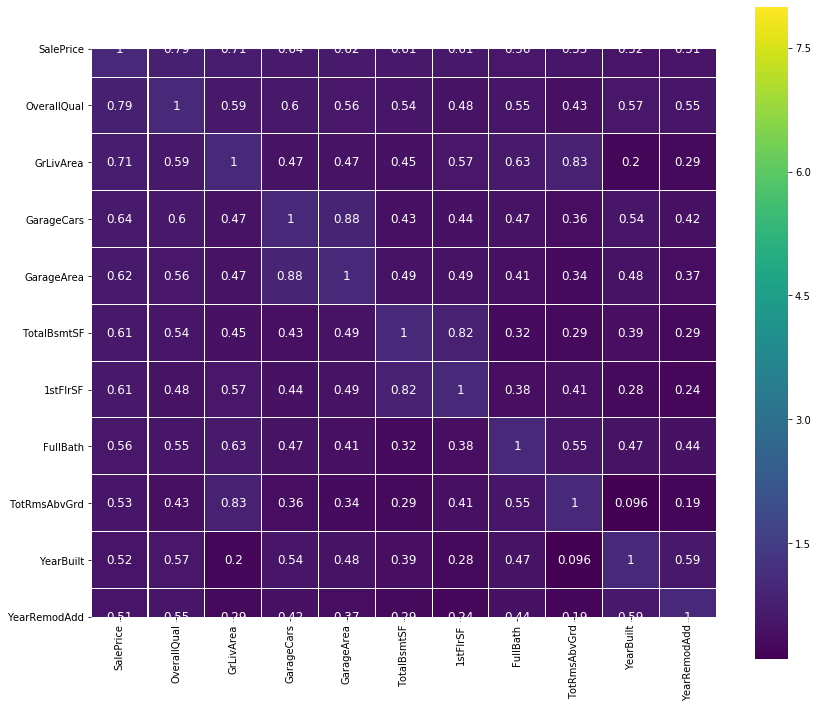

In [20]:
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(cm,vmax=8, linewidths=0.01, square=True,
           annot=True, cmap='viridis',
           linecolor='white', xticklabels=cols.values,
           annot_kws={'size':12}, yticklabels=cols.values)

#높은 상관관계를 가지는 feature를 본다.
#twin으로 보여지는 feature 두개는 하나로 봐도 된다.


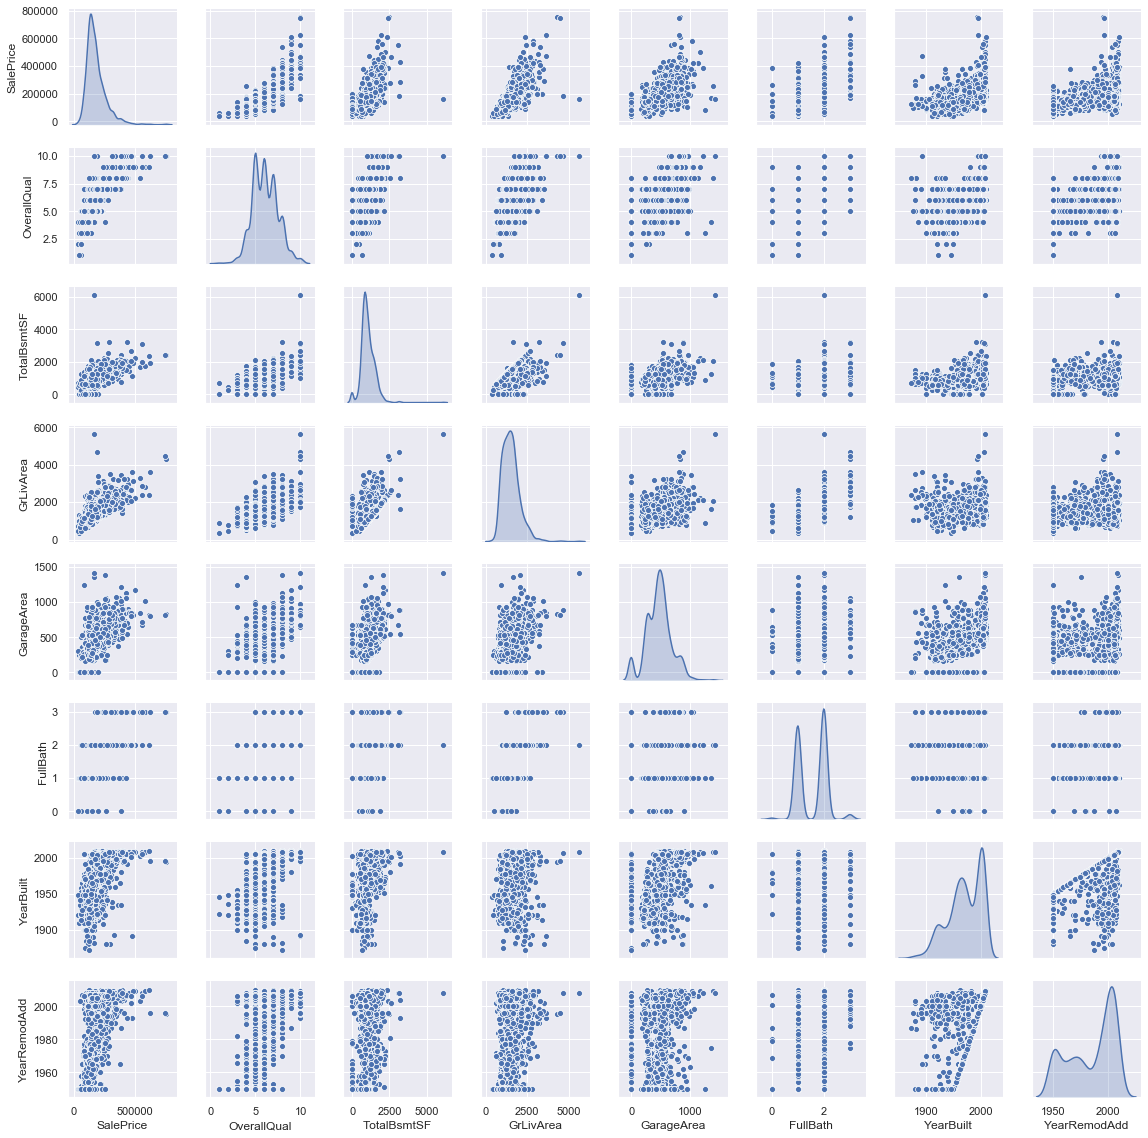

In [21]:
#Pair plot
#'OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath',
#'YearBuilt','YearRemodAdd'
#위의 과정을 통해서 
#타겟과 관련된 feature들을 본다?

sns.set()
columns=['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath',
        'YearBuilt','YearRemodAdd']
sns.pairplot(df_train[columns], size=2, kind='scatter', diag_kind='kde')


#dot cloud???


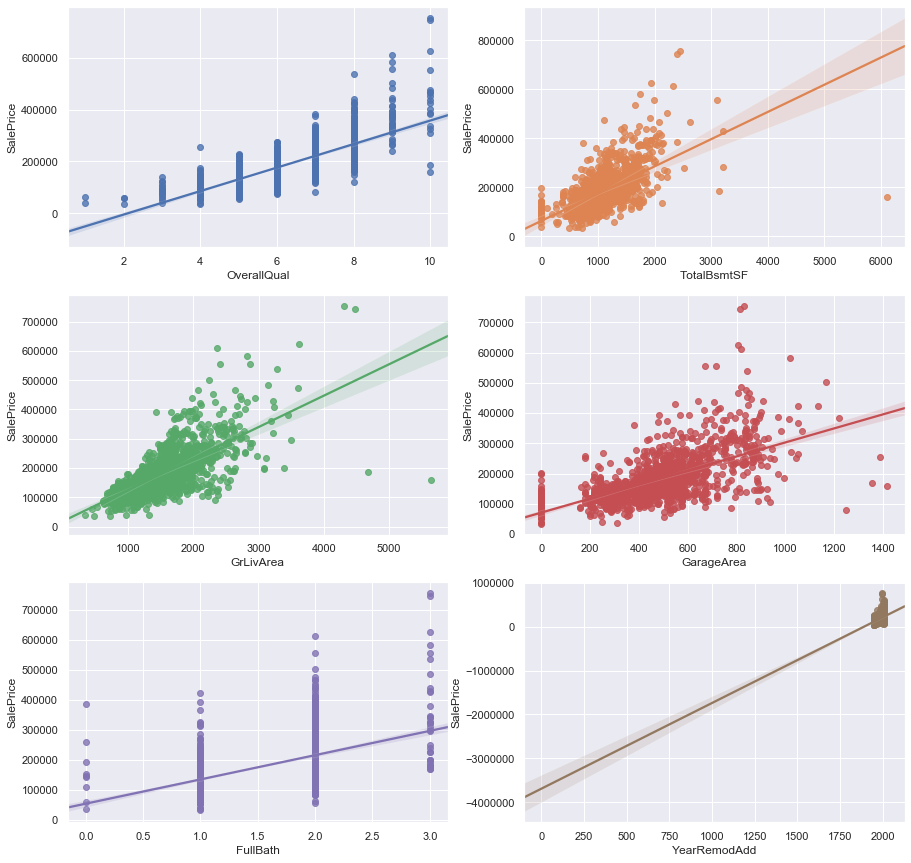

In [22]:
#scatter plot
fig, ax = plt.subplots(3,2,figsize=(15,15))
#pd.concat
'''
데이터의 속성 형태가 동일한 데이터셋이 있으면, 
이들을 합칠 수 있다. 
'''
OverallQual_scatter_plot=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
sns.regplot(x='OverallQual',y='SalePrice',data=OverallQual_scatter_plot,
           scatter=True, fit_reg=True,ax=ax[0,0])
TotalBsmtSF_scatter_plot=pd.concat([df_train['SalePrice'],df_train['TotalBsmtSF']],axis=1)
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=TotalBsmtSF_scatter_plot,
           scatter=True, fit_reg=True, ax=ax[0,1])

GrLivArea_scatter_plot=pd.concat([df_train['SalePrice'],df_train['GrLivArea']], axis=1)
sns.regplot(x='GrLivArea',y='SalePrice',data=GrLivArea_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[1,0])
GarageArea_scatter_plot=pd.concat([df_train['SalePrice'],df_train['GarageArea']],axis=1)
sns.regplot(x='GarageArea',y='SalePrice',data=GarageArea_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[1,1])

FullBath_scatter_plot=pd.concat([df_train['SalePrice'],df_train['FullBath']],axis=1)
sns.regplot(x='FullBath',y='SalePrice',data=FullBath_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[2,0])
YearRemodAdd_scatter_plot=pd.concat([df_train['SalePrice'],df_train['YearRemodAdd']],axis=1)
sns.regplot(x='YearRemodAdd',y='SalePrice',data=YearRemodAdd_scatter_plot,
           scatter=True,fit_reg=True,ax=ax[2,1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


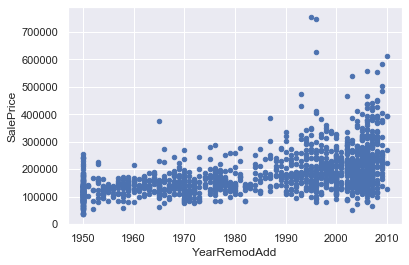

In [23]:
YearRemodAdd_scatter_plot.plot.scatter('YearRemodAdd','SalePrice')

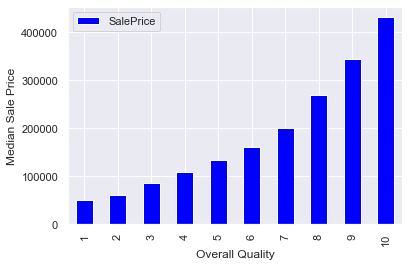

In [24]:
saleprice_overall_quality=df_train.pivot_table(index='OverallQual',
                                               values='SalePrice',
                                               aggfunc=np.median)
#pivot
'''
df를 다시 재구성, index에 따른 col를 다시 정하여 value의 위치를 재배열
'''
saleprice_overall_quality.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.show()

(-0.5, 9.5, 0, 800000)

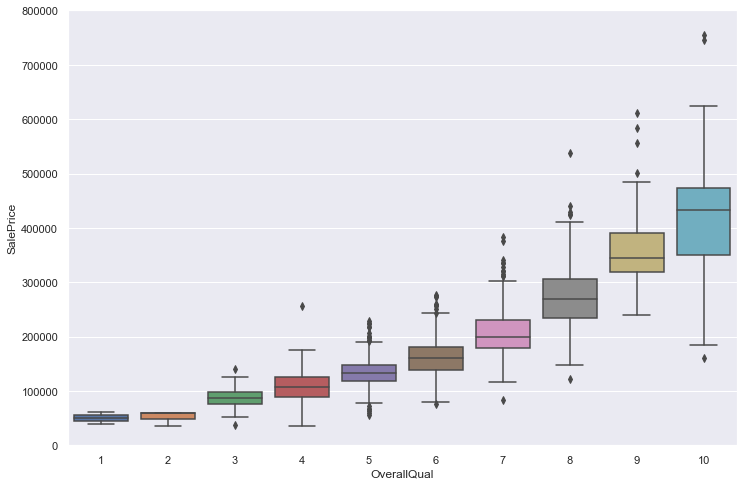

In [25]:
#boxplot
data=pd.concat([df_train['SalePrice'],df_train['OverallQual']],axis=1)
f,ax=plt.subplots(figsize=(12,8))
fig=sns.boxplot(x='OverallQual',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

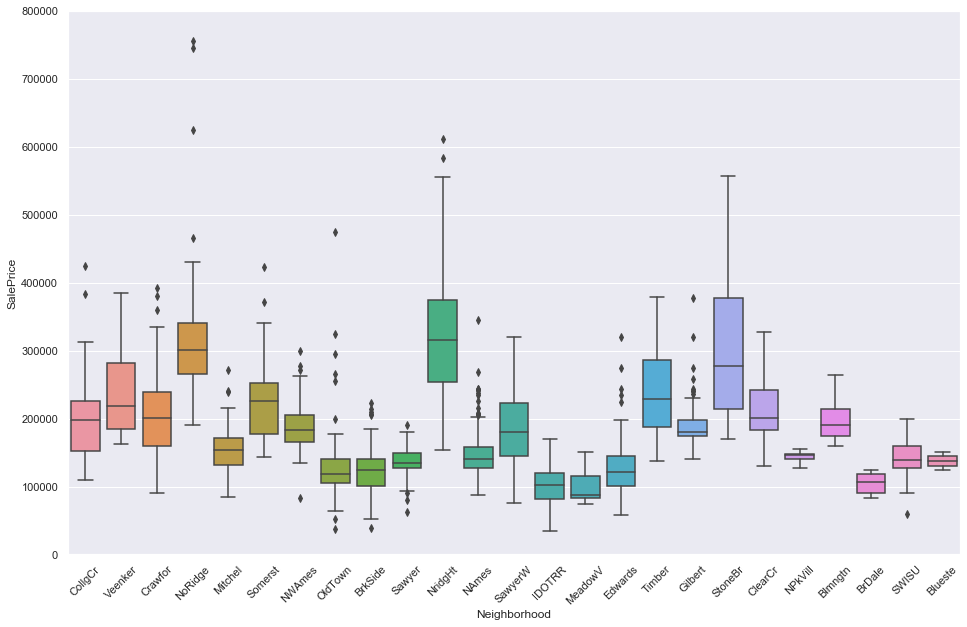

In [26]:
data=pd.concat([df_train['SalePrice'],df_train['Neighborhood']],axis=1)
f,ax=plt.subplots(figsize=(16,10))
fig=sns.boxplot(x='Neighborhood',y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
xt = plt.xticks(rotation=45)  #??????

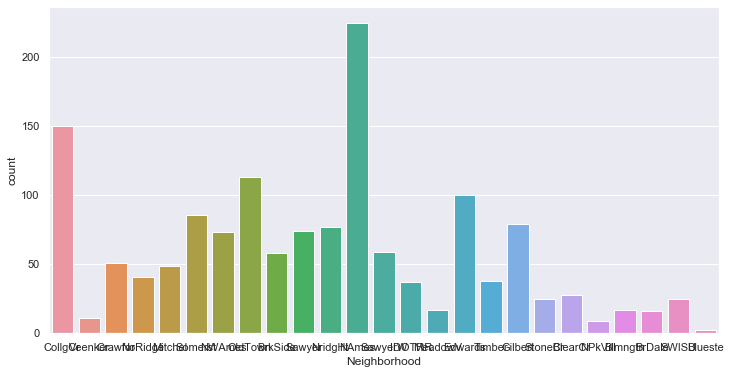

In [27]:
#countplot
plt.figure(figsize=(12,6))
# f,ax=plt.subplots(figsize=(12,6))
fig=sns.countplot(x='Neighborhood',data=data)
# xt=plt.xticks(rotations=45)

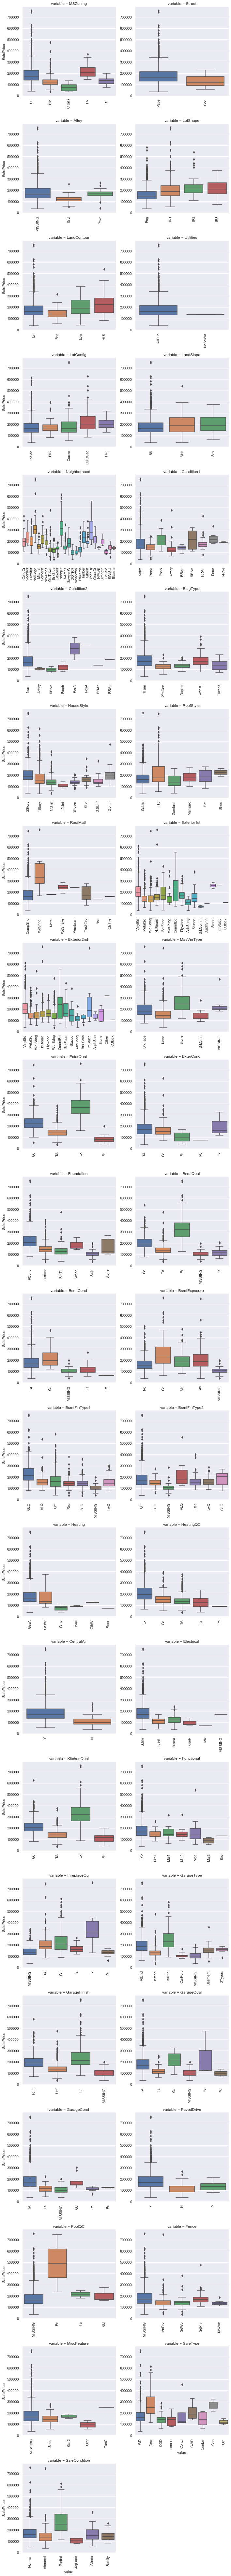

In [29]:
#With qualitative variables we can check distribution of SalePrice with respect to variable values and enumerate them.
# 사분위수를 함께 표시해준다.
#사분위수 = 지나치게 벗어나는 값을 제외하고 핵심적인 범주의 데이터만 범위로 지정하는 방법

for c in df_train_obj:
    df_train[c] = df_train[c].astype('category')
    if df_train[c].isnull().any():
        df_train[c] = df_train[c].cat.add_categories(['MISSING'])
        df_train[c] = df_train[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(df_train, id_vars=['SalePrice'], value_vars=df_train_obj)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")


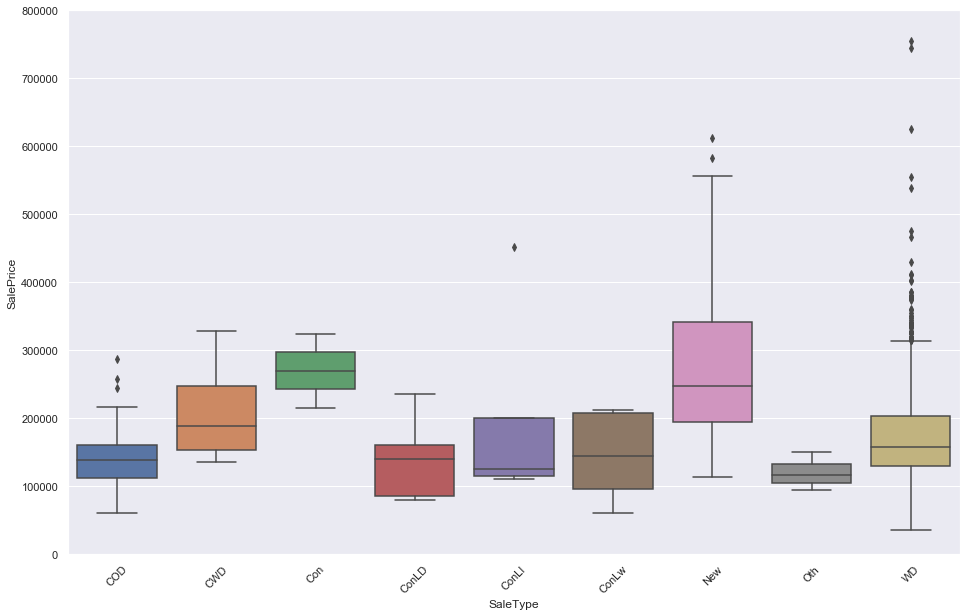

In [30]:
#Housing Price vs Sales

var = 'SaleType'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

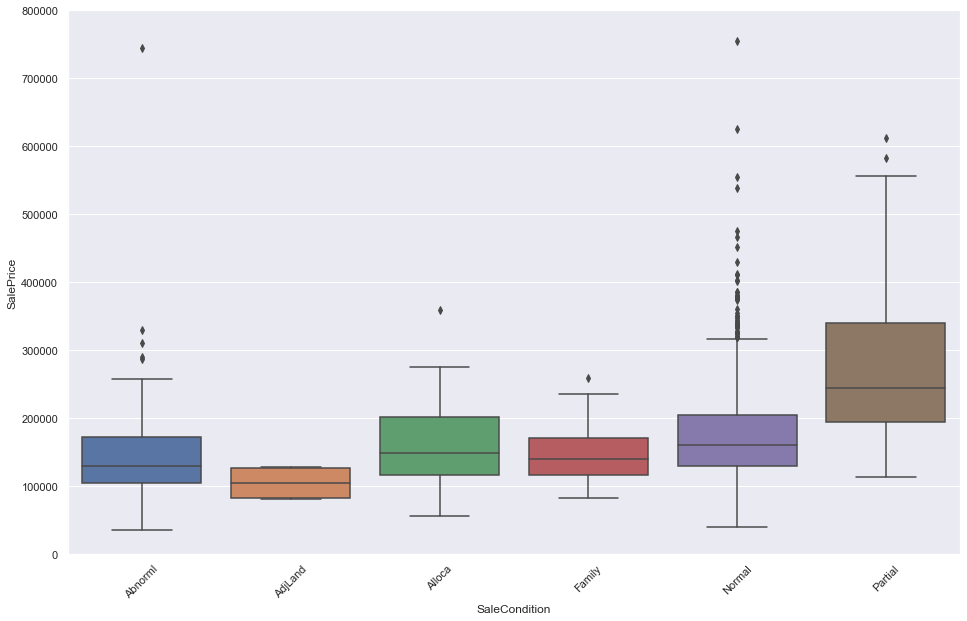

In [31]:
var = 'SaleCondition'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
xt = plt.xticks(rotation=45)

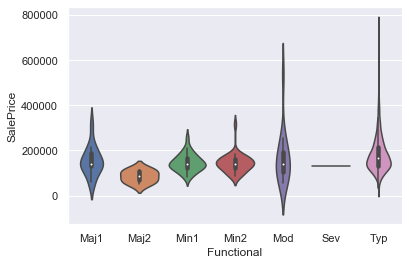

In [34]:
#violin plot
#feature과 saleprice
sns.violinplot('Functional', 'SalePrice', data = df_train)

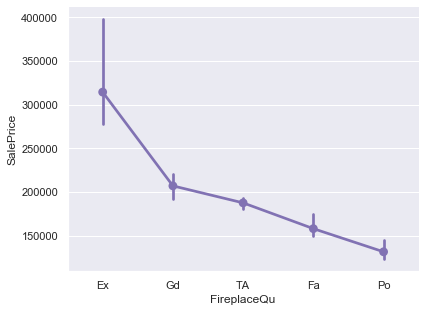

In [35]:
#factor plot
#FirePlaceQC vs. SalePrice
sns.factorplot('FireplaceQu', 'SalePrice', data = df_train, color = 'm', \
               estimator = np.median, order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'], size = 4.5,  aspect=1.35)

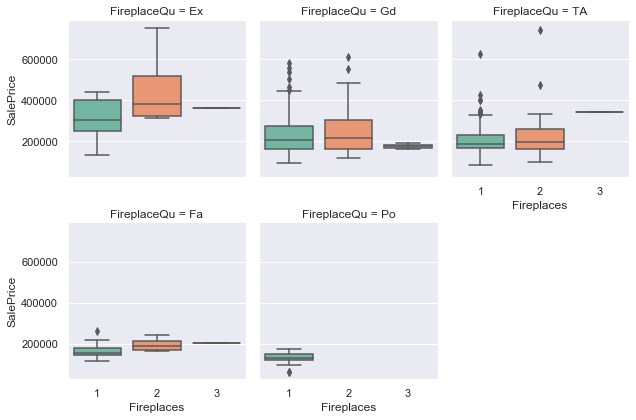

In [37]:
#factor grid plot
#FirePlace QC vs.SalePrice
g = sns.FacetGrid(df_train, col = 'FireplaceQu', col_wrap = 3, col_order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])
g.map(sns.boxplot, 'Fireplaces', 'SalePrice', order = [1, 2, 3], palette = 'Set2')

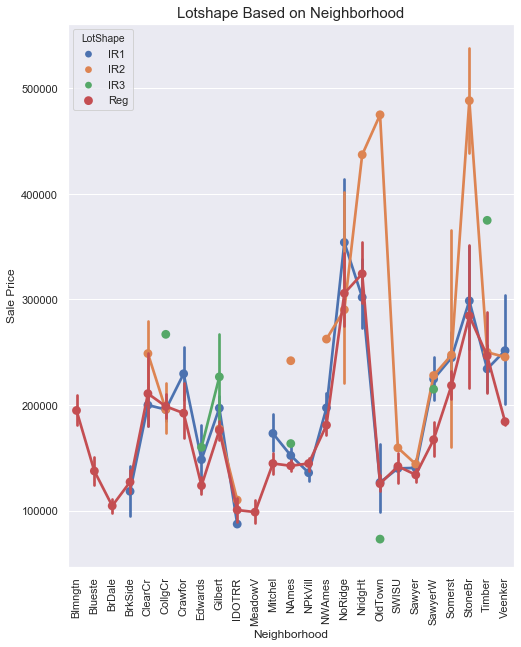

In [38]:
#point plot 
#hue를 추가하여 분류 세분화

plt.figure(figsize=(8,10))
g1 = sns.pointplot(x='Neighborhood', y='SalePrice', 
                   data=df_train, hue='LotShape')
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Lotshape Based on Neighborhood", fontsize=15)
g1.set_xlabel("Neighborhood")
g1.set_ylabel("Sale Price", fontsize=12)
plt.show()

In [39]:
#missing value
#null

total = df_train_num.isnull().sum().sort_values(ascending=False)
percent = (df_train_num.isnull().sum()/df_train_num.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', '% of Total Observations'])
missing_data.index.name =' Numeric Feature'

missing_data.head(20)

,Total Missing Count,% of Total Observations
Numeric Feature,,
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
BsmtFinSF1,0,0.000000
LowQualFinSF,0,0.000000
2ndFlrSF,0,0.000000
1stFlrSF,0,0.000000
TotalBsmtSF,0,0.000000
BsmtUnfSF,0,0.000000


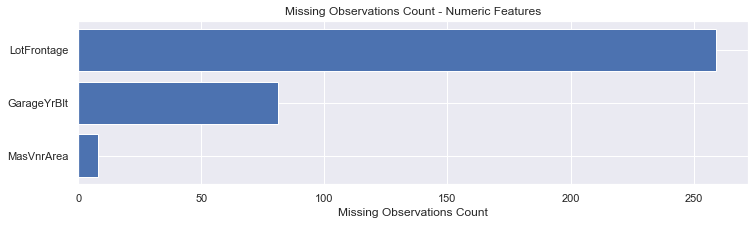

In [40]:
#bar로 어느정도인지 표현(null이 있는 것만)

missing_values = df_train_num.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,3))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [41]:
#categorical feature 중의 null

total = df_train_obj.isnull().sum().sort_values(ascending=False)
percent = (df_train_obj.isnull().sum()/df_train_obj.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count', ' % of Total Observations'])
missing_data.index.name ='Feature'
missing_data.head(20)

,Total Missing Count,% of Total Observations
Feature,,
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


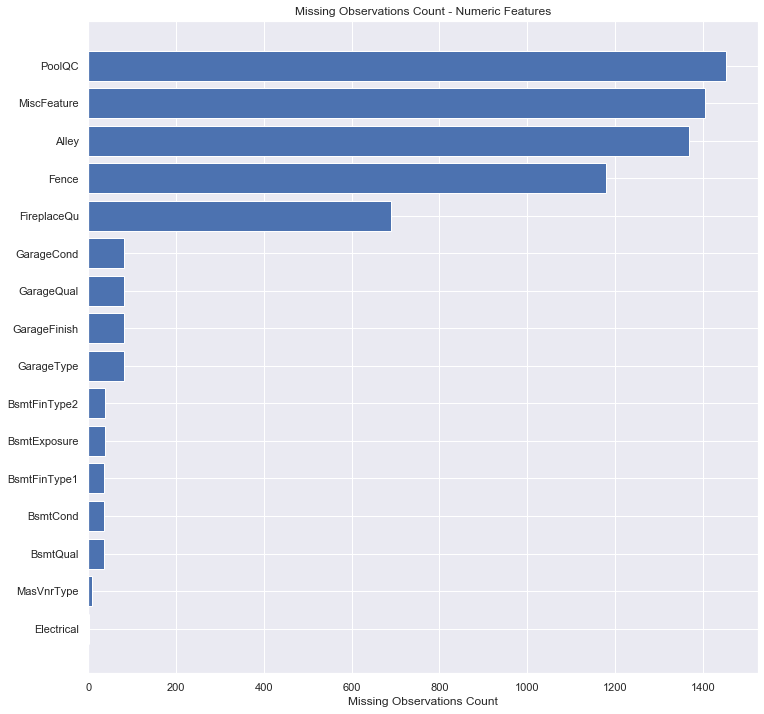

In [46]:
missing_values = df_train_obj.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

ind = np.arange(missing_values.shape[0])
width = 0.1
fig, ax = plt.subplots(figsize=(12,12))
rects = ax.barh(ind, missing_values.missing_count.values, color='b')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values, rotation='horizontal')
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - Numeric Features")
plt.show()

In [50]:
#categorical feature들의 uique 키를 찾아 null에 배치?
for column_name in df_train.columns:
    if df_train[column_name].dtypes == 'object':
        df_train[column_name] = df_train[column_name].fillna(df_train[column_name].mode().iloc[0]) #mode?
        unique_category = len(df_train[column_name].unique())
        print("Feature '{column_name}' has '{unique_category}' unique categories".format(column_name = column_name,
                                                                                         unique_category=unique_category))